Movies_Clean Data File - Exploratory Data Analysis (EDA)

Performing EDA will will help give insight to the data, an understanding of the data types, and allow us to determine what features are important and the relationships between them.  We can also test any underlying assumptions during the exploratory phase.

In [1]:
# Import the neccessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the data in to a dataframe and review the data
movies_df = pd.read_csv('./Resources/movies_final_final.csv', encoding = "ISO-8859-1")
movies_df.head()



,index,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
0,15,Tangled,260000000,584899819,tt0398286,260000000.0,591794936.0,Animation,"Nathan Greno, Byron Howard",Mandy Moore
1,37,Men in Black 3,215000000,654213485,tt1409024,225000000.0,624026776.0,Action,Barry Sonnenfeld,Will Smith
2,759,Sphere,73000000,50168294,tt0120184,75000000.0,13100000.0,Science Fiction,Barry Levinson,Dustin Hoffman
3,186,Transformers,151000000,708272592,tt0418279,150000000.0,709709780.0,Adventure,Michael Bay,Shia LaBeouf
4,38,Transformers: Revenge of the Fallen,210000000,836519699,tt1055369,150000000.0,836297228.0,Science Fiction,Michael Bay,Shia LaBeouf


In [3]:
# Dropped Index Column
#movies_df.drop(['ï»¿Index'], axis = 1)
movies_df.drop(movies_df.columns[0], axis = 1, inplace = True)



In [4]:
movies_df.describe(include='all')

,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
count,3215,3.215000e+03,3.215000e+03,3215,3.215000e+03,3.215000e+03,3215,3215,3215
unique,2994,NaN,NaN,3020,NaN,NaN,18,1406,1141
top,Hercules,NaN,NaN,tt0848228,NaN,NaN,Comedy,Clint Eastwood,Bruce Willis
freq,8,NaN,NaN,4,NaN,NaN,738,18,29
mean,NaN,4.342407e+07,1.261607e+08,NaN,4.434613e+07,1.247969e+08,NaN,NaN,NaN
std,NaN,4.548661e+07,2.048779e+08,NaN,4.521682e+07,2.006759e+08,NaN,NaN,NaN
min,NaN,7.000000e+03,0.000000e+00,NaN,1.000000e+00,8.000000e+00,NaN,NaN,NaN
25%,NaN,1.300000e+07,1.732577e+07,NaN,1.400000e+07,1.667303e+07,NaN,NaN,NaN
50%,NaN,2.900000e+07,5.420711e+07,NaN,3.000000e+07,5.300000e+07,NaN,NaN,NaN
75%,NaN,6.000000e+07,1.492495e+08,NaN,6.000000e+07,1.453500e+08,NaN,NaN,NaN


In [5]:
# Shows the numbers of rows and columns

movies_df.shape

(3215, 9)

In [6]:
#Check to see if the dtypes line up to  ake sure the fields with numbers are a numeric data type and text fields are objects 

movies_df.info()

# there are null values in some of these fields and we will need to address them by deciding to drop, fill or ignore them
# Key fields such are the gross, budget, actor/actress, and director will need to get dropped or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     3215 non-null   object 
 1   production_budget  3215 non-null   int64  
 2   worldwide_gross    3215 non-null   int64  
 3   imdb_id            3215 non-null   object 
 4   budget             3215 non-null   float64
 5   revenue            3215 non-null   float64
 6   genres             3215 non-null   object 
 7   director           3215 non-null   object 
 8   primary_actor      3215 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 226.2+ KB


In [7]:
# Check for the number of Nulls/Nans
movies_df.isnull().sum()

original_title       0
production_budget    0
worldwide_gross      0
imdb_id              0
budget               0
revenue              0
genres               0
director             0
primary_actor        0
dtype: int64

<AxesSubplot:>

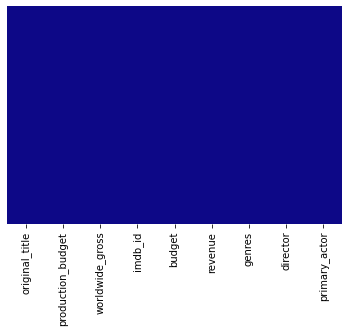

In [8]:
# Visualizing Missing Values
sn.heatmap(movies_df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

#Budget and Revenue has some missing values


At this point we can see that there are 2983 Movies and 10 columns in our dataset
The data types consist of float64(2), int64(2), and objects object(6)
There are some null values in the budget and revenue fields
This is important because we are expecting the budget field to be a significant influencer of the Gross Revenue


###### How do we want to handle nulls in our budget and gross colums? Drop them? Fill them in from other data sources?  Fill budget in with a mean? 

In [9]:
# Another item to look for in key numeric fields is 0 values

print(movies_df.budget[movies_df.budget==0].count())
print(movies_df.revenue[movies_df.revenue==0].count())

# no zeros in budget or gross columns

0
0


In [10]:
# Filter out rows with a zero to a different dataFrame --- if needed --- might use with NAN later on
# movies_df_0_budget = movies_df[movies_df.budget==0].reset_index(drop=True)

# movies_df = movies_df[movies_df.budget!=0].reset_index(drop=True)


# Check 0 budgets again
# movies_df.budget[df.budget==0].count()

##### do something with release date??  Parse it out with the above code or drop it all together

In [11]:
# Total number of rows and columns
movies_df.shape

# Rows containing duplicate data
duplicate_rows_df = movies_df[movies_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# No Duplicate Rows

number of duplicate rows:  (0, 9)


In [12]:
# Reviewing the unique values in categorical variables  

# ---- not my favorite view, might move this to column breakout analysis and show unique values there

# can scan for an outlier, but the analysis comes later

#print('Movie Name')
#print(*list(movies_df.original_title.unique()))  #to many print to be useful
print('Genre')
print(*list(movies_df.genres.unique()))
print('Revenue')
print(*list(movies_df.revenue.unique()))
print('Worldwide Gross')
print(*list(movies_df.worldwide_gross.unique()))
print('Budget')
print(*list(movies_df.budget.unique())) 
print('Production Budget') 
print(*list(movies_df.production_budget.unique()))
print('Primary Actor/Actress')
print(*list(movies_df.primary_actor.unique()))
print('Director')
print(*list(movies_df.director.unique()))
#print('Producer')
#print(*list(movies_df.producers.unique()))
#print('Runtime')
#print(*list(movies_df.runtime.unique()))

#Skipped Index and IMDBID

Genre
Animation Action Science Fiction Adventure Drama War Comedy Fantasy Crime Family Music History Thriller Romance Western Horror Mystery Documentary
Revenue
591794936.0 624026776.0 13100000.0 709709780.0 836297228.0 459359555.0 310669540.0 276572938.0 272912430.0 550000000.0 372234864.0 1845034188.0 77741732.0 304654182.0 1056057273.0 96976270.0 1028570889.0 271430189.0 1066969703.0 1091405097.0 131000000.0 1215439994.0 69766619.0 104324083.0 1025491110.0 179379533.0 101595121.0 73345029.0 743559607.0 261200000.0 68267862.0 747862775.0 11466088.0 705717432.0 769653595.0 258384.0 371353001.0 33472850.0 75450437.0 219851172.0 50315140.0 224920315.0 175372502.0 169837010.0 304320254.0 123494610.0 139000000.0 215000000.0 24719215.0 57806952.0 9793496.0 41863726.0 13323144.0 1123746996.0 45465299.0 407778013.0 65000000.0 415885488.0 176885658.0 197687603.0 12382362.0 82394288.0 80197993.0 18618284.0 161772375.0 1506249360.0 97594140.0 50100000.0 42647449.0 54926886.0 467365246.0 1320000

584899819 654213485 50168294 708272592 836519699 459260946 322459006 280355920 269806430 550517357 367262558 2207986545 78948765 304249198 1055135598 96971293 1025006125 272223000 1068879522 1104054072 131011757 1215392272 69792704 104324083 1025491110 180148897 101636047 101815660 743455810 252091016 67130045 747862775 11532774 708996336 757677748 437002 365491792 43980363 75997067 219535492 64978140 224922135 174807445 156553592 69965374 127990741 138708527 245768384 25268680 58501127 9813309 41294674 13052741 1123794079 49678401 409953905 65063726 176885658 197687603 10393696 82409520 99296462 18535575 160558438 1514553486 94050951 50054511 42799060 55307857 467381584 13174426 77477297 68613992 114576403 531861650 12803305 19303058 80171596 70949793 353640419 183097323 6882696 411002906 46844357 333771037 215448997 8120148 40127259 14249005 560155383 432566361 585171547 67215435 998615789 21896367 3393606 159157447 43924923 786635413 554606532 8130727 225925989 98963392 30768449 125

 30962112 23676771 82182803 40520649 36722311 19892205 28542494 32955399 26323969 32262866 27147991 16873925 21577076 26184400 12885574 48330757 11578022 17865209 19599974 10419084 17121823 16481405 64352607 7005468 4967493 18765585 42064105 3252550 35891257 3721988 7755686 4315789 5466698 287215196 187707495 78652207 97413527 51636504 45336404 56000339 28452945 24716190 20146150 33013805 10066366 4559569 15452978 504050219 202182981 140894685 15358583 105159085 133162752 141809235 94500826 64474705 112914167 94728529 103452875 71430876 82119036 97531134 60780981 102053581 45147989 41146935 33000377 31390587 38959900 63129909 62108587 46752858 73421224 38159905 31320293 16638300 8891623 8165213 5686694 219265952 43607627 31157914 26939925 155564919 96900000 60527873 44342956 44270131 93466095 130759651 80681183 31770413 55495466 27257061 28773827 10341093 8723600 9352089 4485485 16566235 2412123 185904750 160822438 279500000 202000000 102404019 201324422 61308153 96666486 81275291 9039

Nathan Greno, Byron Howard Barry Sonnenfeld Barry Levinson Michael Bay Brett Ratner Ridley Scott Tony Gilroy Rob Minkoff Peter Jackson Chris Weitz James Cameron Tom Dey John Moore Gareth Edwards Jean-Jacques Annaud Andrew Stanton Dennis Dugan Lee Unkrich Mike Nichols Shane Black Neil Jordan Geoff Murphy Tim Burton Larry Charles Keenen Ivory Wayans Ted Demme Dan Scanlon Kenny Ortega Akiva Schaffer Bryan Singer Robert Butler Marc Webb Roland Emmerich Jeremy Saulnier McG Kent Alterman David Dobkin Martin Campbell Iain Softley David Fincher Rob Reiner Bobby Farrelly, Peter Farrelly Barry Cook, Tony Bancroft Frank Coraci Curtis Hanson Ken Kwapis Ericson Core Gary Fleder Anne Fletcher Paul McGuigan Alex Kurtzman Stephen Sommers Harold Ramis Les Mayfield Kimberly Peirce Jared Hess Lasse HallstrÃ¶m Robert Zemeckis James Wan Howard Deutch James Gartner James Gray J. J. Abrams John Schultz Peter Chelsom Kevin Costner Ronny Yu Marc Forster Jerry Zaks Bennett Miller Jeremy Garelick Christopher Spe

Dave Filoni Ari Sandel Dan Gilroy David E. Talbert Vondie Curtis Hall Jonathan Dayton, Valerie Faris Tom Gormican Masayuki Ochiai Jonas Elmer John Carney Mary Harron Gregory Dark Matty Rich Alfonso Gomez-Rejon Anna Boden, Ryan Fleck Fina Torres Luke Scott Mark L. Lester Steve James Michael Corrente Keith Gordon Marc SchÃ¶lermann Charles Robert Carner Russell Holt Stacy Title Rob Marcarelli Adam Brooks Dan Cutforth, Jane Lipsitz Fran Rubel Kuzui Aaron Schneider Tom Ford Paul Schrader Bob Gosse Shari Springer Berman, Robert Pulcini Spencer Susser Alex Zamm Leon Ichaso Troy Duffy Mark Tonderai Damian Nieman Nicole Holofcener Louis Morneau Oren Moverman Gary Hardwick Fred Savage Rusty Cundieff Brian Klugman, Lee Sternthal Risa Bramon Garcia Raymond De Felitta Deb Hagan Trevor Moore, Zach Cregger Mark Tarlov Rob Thomas Billy Ray David Atkins John Cameron Mitchell Eli Roth Stefan Ruzowitzky Christopher Coppola Kate Barker-Froyland Preston A. Whitmore II Darren Grant Joseph Gordon-Levitt Jame

In [13]:
## Review data types again now that we have seen the unique values and determine if any need to be changed? 

# Release date needs to be cleaned to be useful
# Year needs to be converted to Category so it isn't treated like a number

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     3215 non-null   object 
 1   production_budget  3215 non-null   int64  
 2   worldwide_gross    3215 non-null   int64  
 3   imdb_id            3215 non-null   object 
 4   budget             3215 non-null   float64
 5   revenue            3215 non-null   float64
 6   genres             3215 non-null   object 
 7   director           3215 non-null   object 
 8   primary_actor      3215 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 226.2+ KB


In [14]:
# In looking at the unique values there was a movie with a run time of 366 minites whcih seems like an outlier
# Reviewing the row to get more information
# For now it will be left in --------------------------------------------------
# movies_df[movies_df.runtime==366.0]

#No Runtime in this dataset

In [15]:
## Years is showing as an integer and needs to be converted to a category
# movies_df.year=pd.Categorical(movies_df.year)
movies_df.Index=pd.Categorical(movies_df.index)
#no years in this dataset


#### Does anything else need to be converted to categorical?

In [16]:
# Check to see if changes took place
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     3215 non-null   object 
 1   production_budget  3215 non-null   int64  
 2   worldwide_gross    3215 non-null   int64  
 3   imdb_id            3215 non-null   object 
 4   budget             3215 non-null   float64
 5   revenue            3215 non-null   float64
 6   genres             3215 non-null   object 
 7   director           3215 non-null   object 
 8   primary_actor      3215 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 226.2+ KB


In [17]:
# Display only numeric cloumns
# The describe function provides the count, mean, standard deviation, minimum and maximum values and the quantities of 
# the data.
movies_df.describe().T 


,count,mean,std,min,25%,50%,75%,max
production_budget,3215.0,4.342407e+07,4.548661e+07,7000.0,13000000.0,29000000.0,60000000.0,3.790000e+08
worldwide_gross,3215.0,1.261607e+08,2.048779e+08,0.0,17325774.5,54207112.0,149249538.5,2.845900e+09
budget,3215.0,4.434613e+07,4.521682e+07,1.0,14000000.0,30000000.0,60000000.0,3.800000e+08
revenue,3215.0,1.247969e+08,2.006759e+08,8.0,16673027.5,53000000.0,145350000.0,2.787965e+09


In [18]:
# Display all cloumns
movies_df.describe(include='all').T

# Look at the difference between 75% and Max for Budget

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
original_title,3215,2994,Hercules,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,3215.0,NaN,NaN,NaN,43424069.744012,45486610.117416,7000.0,13000000.0,29000000.0,60000000.0,379000000.0
worldwide_gross,3215.0,NaN,NaN,NaN,126160735.933126,204877937.759706,0.0,17325774.5,54207112.0,149249538.5,2845899541.0
imdb_id,3215,3020,tt0848228,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,3215.0,NaN,NaN,NaN,44346133.186625,45216817.011368,1.0,14000000.0,30000000.0,60000000.0,380000000.0
revenue,3215.0,NaN,NaN,NaN,124796862.671229,200675864.18049,8.0,16673027.5,53000000.0,145350000.0,2787965087.0
genres,3215,18,Comedy,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,3215,1406,Clint Eastwood,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_actor,3215,1141,Bruce Willis,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Lets take a look at the movie with a 380m budget
movies_df[movies_df.budget==380000000.0]

,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
3084,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,tt1298650,380000000.0,1.045714e+09,Adventure,Rob Marshall,Johnny Depp


In [20]:
# Lets take a look at the movie with a production budget of 379m
movies_df[movies_df.production_budget==379000000.0]

,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
3084,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,tt1298650,380000000.0,1.045714e+09,Adventure,Rob Marshall,Johnny Depp


In [21]:
# Lets take a look at the movie with a 2 trillion in Worldwide gross revenue

movies_df[movies_df.worldwide_gross==2845899541.0]

,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
3162,Avatar,237000000,2845899541,tt0499549,237000000.0,2.787965e+09,Action,James Cameron,Sam Worthington


In [22]:
# Lets take a look at the movie with a 2 trillion in gross revenue

movies_df[movies_df.revenue==2787965087.0]

,original_title,production_budget,worldwide_gross,imdb_id,budget,revenue,genres,director,primary_actor
3162,Avatar,237000000,2845899541,tt0499549,237000000.0,2.787965e+09,Action,James Cameron,Sam Worthington


In [23]:
# Display all cloumns
# movies_df.describe(include='all')

# Correlation Analysis

<AxesSubplot:>

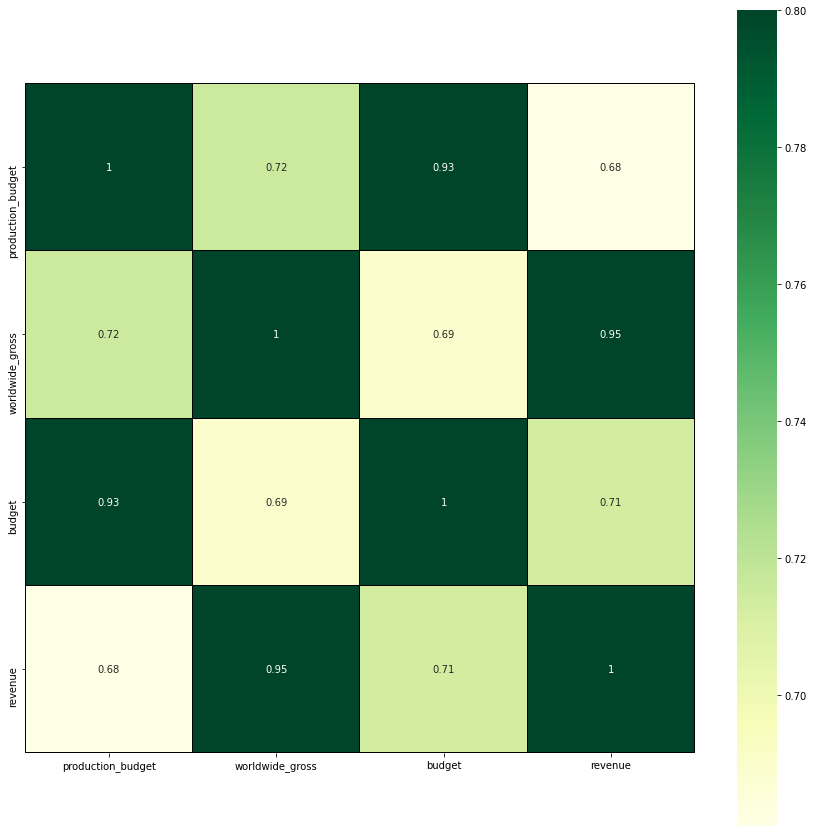

In [24]:
# HeatMaps: are a type of plot which is necessary to find the dependent variables. 
# One of the best ways to find the relationship between the features can be done using heat maps

corr=movies_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGn',linecolor='black')

# Below, positive correlation is represented by dark shades and negative correlation by lighter shades.
# shows if one variable influenced by other variable

# Votes influences revenue the most with a positive correlation of .74
# Budget influences revenue the with a positive correlation of .69

In [25]:
# Numerical Representation of the Correlations
corr = movies_df.corr()
corr

,production_budget,worldwide_gross,budget,revenue
production_budget,1.000000,0.724812,0.918570,0.673741
worldwide_gross,0.724812,1.000000,0.657524,0.916045
budget,0.918570,0.657524,1.000000,0.718913
revenue,0.673741,0.916045,0.718913,1.000000


<AxesSubplot:xlabel='production_budget', ylabel='revenue'>

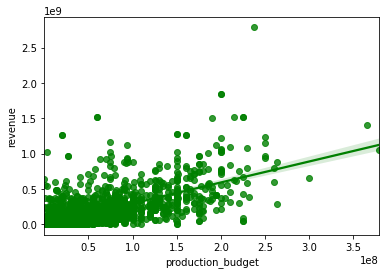

In [26]:
# plots between independent variable - production budget and target variable - gross
sn.regplot(x=movies_df.production_budget, y=movies_df.revenue, color='g')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

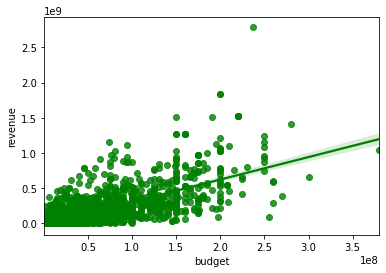

In [27]:
# plots between independent variable - budget  and target variable - revenue
sn.regplot(x=movies_df.budget, y=movies_df.revenue, color='g')

### Need a comment here on the correlation analysis


In [28]:
## Analysis of numeric variables

## Function for finding outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outliers ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

Revenue Analysis

In [29]:
# Analysis on Revenue
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the Gross Revenue

Q1=movies_df.revenue.quantile(.25)
Q3=movies_df.revenue.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.revenue.min())
print("Max Value ",movies_df.revenue.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 8.0
Max Value  2787965087.0
Q1  16673027.5
Q3  145350000.0
IQR  128676972.5
lower_limit -176342431.25
upper_limit 338365458.75


count of outliers  309
Mean  124796862.67122862
Median  53000000.0
Missing values 0
% of Missing values 0.0


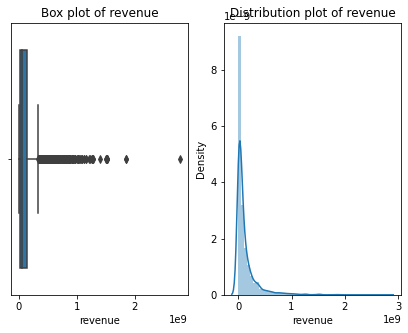

In [30]:
# Revenue Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.revenue)

<AxesSubplot:>

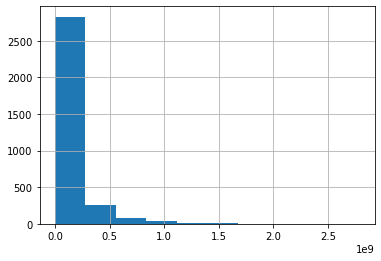

In [31]:
# Gross Histogram — refers to the frequency of occurrence of variables in an interval.
movies_df.revenue.hist()

Text(0, 0.5, 'Number of Movies')

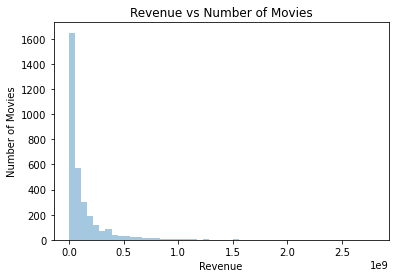

In [32]:
# Revenue vs # of Movies
ax_revenue = sn.distplot(movies_df.revenue,kde=False)
ax_revenue.set_title('Revenue vs Number of Movies')
ax_revenue.set_xlabel('Revenue')
ax_revenue.set_ylabel('Number of Movies')
#plt.savefig("revenue_vs_number_of_movies.png")

Budget Analysis

In [33]:
# Analysis on Budget
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the budget

Q1=movies_df.budget.quantile(.25)
Q3=movies_df.budget.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.budget.min())
print("Max Value ",movies_df.budget.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1.0
Max Value  380000000.0
Q1  14000000.0
Q3  60000000.0
IQR  46000000.0
lower_limit -55000000.0
upper_limit 129000000.0


count of outliers  221
Mean  44346133.1866252
Median  30000000.0
Missing values 0
% of Missing values 0.0


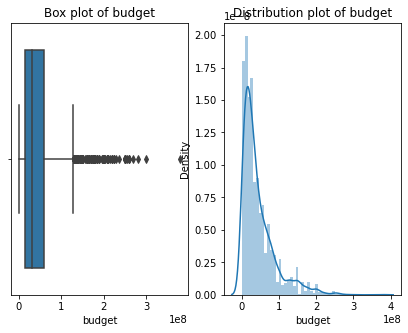

In [34]:
# Budget Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.budget)

<AxesSubplot:>

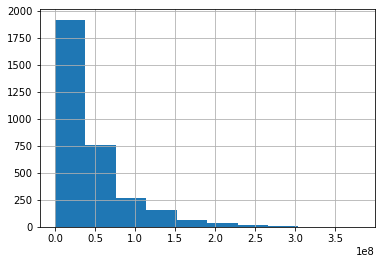

In [35]:
movies_df.budget.hist()
# Histogram — refers to the frequency of occurrence of variables in an interval.

### Histogram  Visualizations

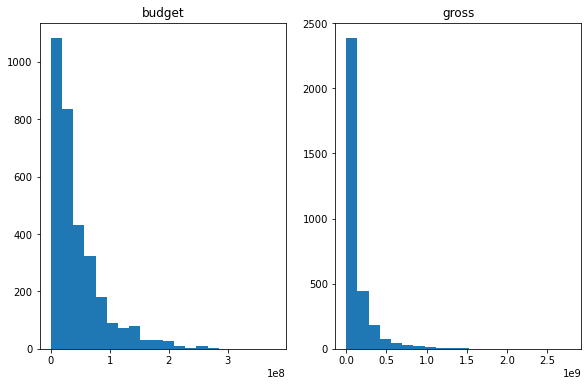

In [36]:
# Using Histograms to to check for outliers in numerical columns
bins = len(movies_df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(movies_df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(movies_df.revenue, bins=20)
plt.title('gross')


plt.show()

## Categorical Analysis

In [37]:
movies_df.primary_actor.value_counts()

Bruce Willis           29
Nicolas Cage           28
Denzel Washington      25
Johnny Depp            25
Robert De Niro         24
                       ..
Melissa Leo             1
Catherine McCormack     1
Hal Scardino            1
Sharni Vinson           1
Michael Stuhlbarg       1
Name: primary_actor, Length: 1141, dtype: int64

In [38]:
# in percentage
movies_df.primary_actor.value_counts(normalize=True)


Bruce Willis           0.009020
Nicolas Cage           0.008709
Denzel Washington      0.007776
Johnny Depp            0.007776
Robert De Niro         0.007465
                         ...   
Melissa Leo            0.000311
Catherine McCormack    0.000311
Hal Scardino           0.000311
Sharni Vinson          0.000311
Michael Stuhlbarg      0.000311
Name: primary_actor, Length: 1141, dtype: float64

In [39]:
# Bar plot for Actor/Actress Category  - #too many to see something usefull here
# sn.factorplot('primary_actor',data=movies_df,kind='count') 

In [40]:
movies_df.director.value_counts()

Clint Eastwood         18
Steven Soderbergh      17
Ridley Scott           16
Joel Schumacher        16
Woody Allen            15
                       ..
Ryan Murphy             1
Marcos Siega            1
Jeffrey Blitz           1
Damien Dante Wayans     1
Kerry Conran            1
Name: director, Length: 1406, dtype: int64

In [41]:
# in percentage
movies_df.director.value_counts(normalize=True)


Clint Eastwood         0.005599
Steven Soderbergh      0.005288
Ridley Scott           0.004977
Joel Schumacher        0.004977
Woody Allen            0.004666
                         ...   
Ryan Murphy            0.000311
Marcos Siega           0.000311
Jeffrey Blitz          0.000311
Damien Dante Wayans    0.000311
Kerry Conran           0.000311
Name: director, Length: 1406, dtype: float64

In [42]:
# Bar plot for Director Category  - #too many to see something usefull here
# sn.factorplot('director',data=movies_df,kind='count') 

In [43]:
#movies_df.producers.value_counts()

#### for actors / directors  should we groups the low volumes together?

In [44]:
# in percentage
#movies_df.producers.value_counts(normalize=True)

In [45]:
movies_df["genres"].unique()

array(['Animation', 'Action', 'Science Fiction', 'Adventure', 'Drama',
       'War', 'Comedy', 'Fantasy', 'Crime', 'Family', 'Music', 'History',
       'Thriller', 'Romance', 'Western', 'Horror', 'Mystery',
       'Documentary'], dtype=object)

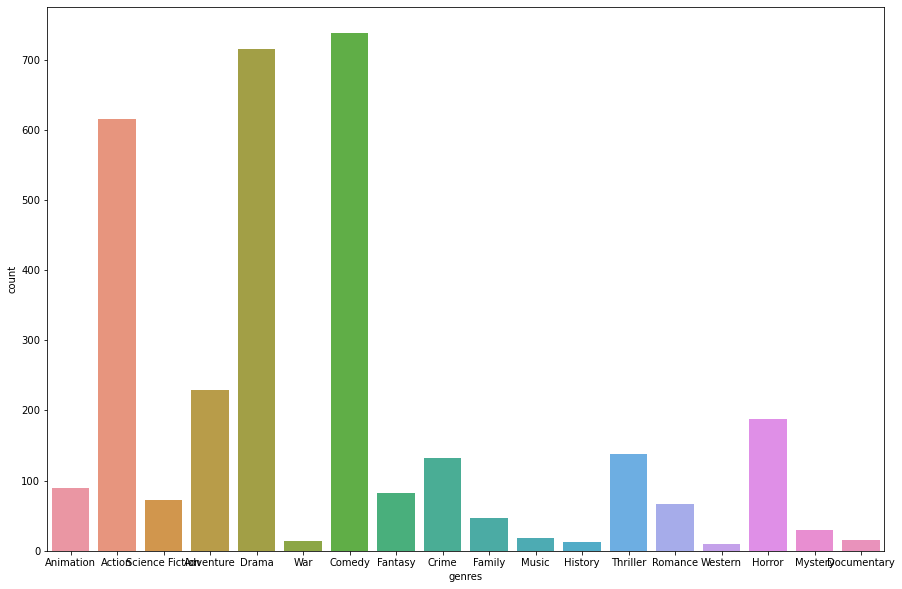

In [46]:
plt.figure(figsize=(15,10))
sn.countplot(x = movies_df["genres"])
plt.show()


18 unique Genre, 
Comedies having the larges number of movies in the dataset, followed by Action and then Drama
These 3 make up more than 50% of all the movies in the dataset


# Data Relationships

In [47]:
# look at relationships between Categories and Revenue
movies_df_strings = movies_df.loc[:, ['director', 'genres', 'original_title', 'primary_actor']]
catgs = {}
for i in list(movies_df_strings.columns):
    catgs[i] = movies_df_strings[i].nunique()
    
catgs

{'director': 1406, 'genres': 18, 'original_title': 2994, 'primary_actor': 1141}

Some Categories have too many values to bar plot - director, original title and primary actor


Animation has the highest average among the different Genre, followed by Family and Action.  


Text(0.5, 1.0, 'Revenue vs. Genre of Movie')

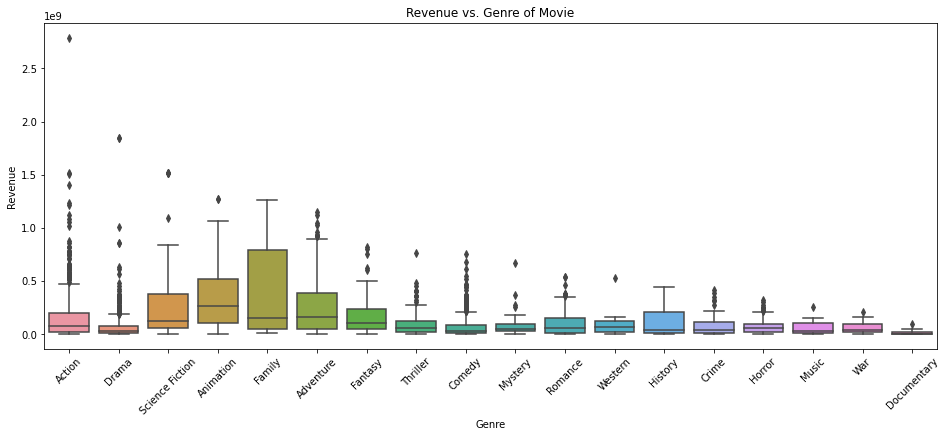

In [48]:
# Genre of movies and Revenue - Box Plot
plt.figure(figsize=(16, 6))
sn.boxplot(x='genres', y='revenue', data=movies_df.sort_values('revenue', ascending=False))
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Revenue vs. Genre of Movie')

Text(0.5, 1.0, 'Budget vs. Revenue')

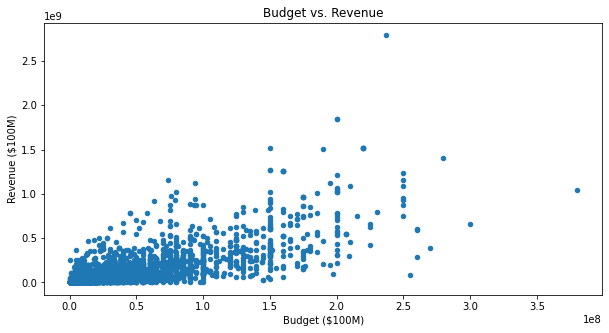

In [49]:
# Scatter PLot - Revenue vs Budget

movies_df.plot.scatter(x='budget', y='revenue', figsize=(10, 5))
plt.xlabel('Budget ($100M)')
plt.ylabel('Revenue ($100M)')
plt.title('Budget vs. Revenue')


This shows a somewhat linear relationship between gross revenue and budget which is not suprise.  
One could assume the more you spend to make a movie the more revenue it might make.


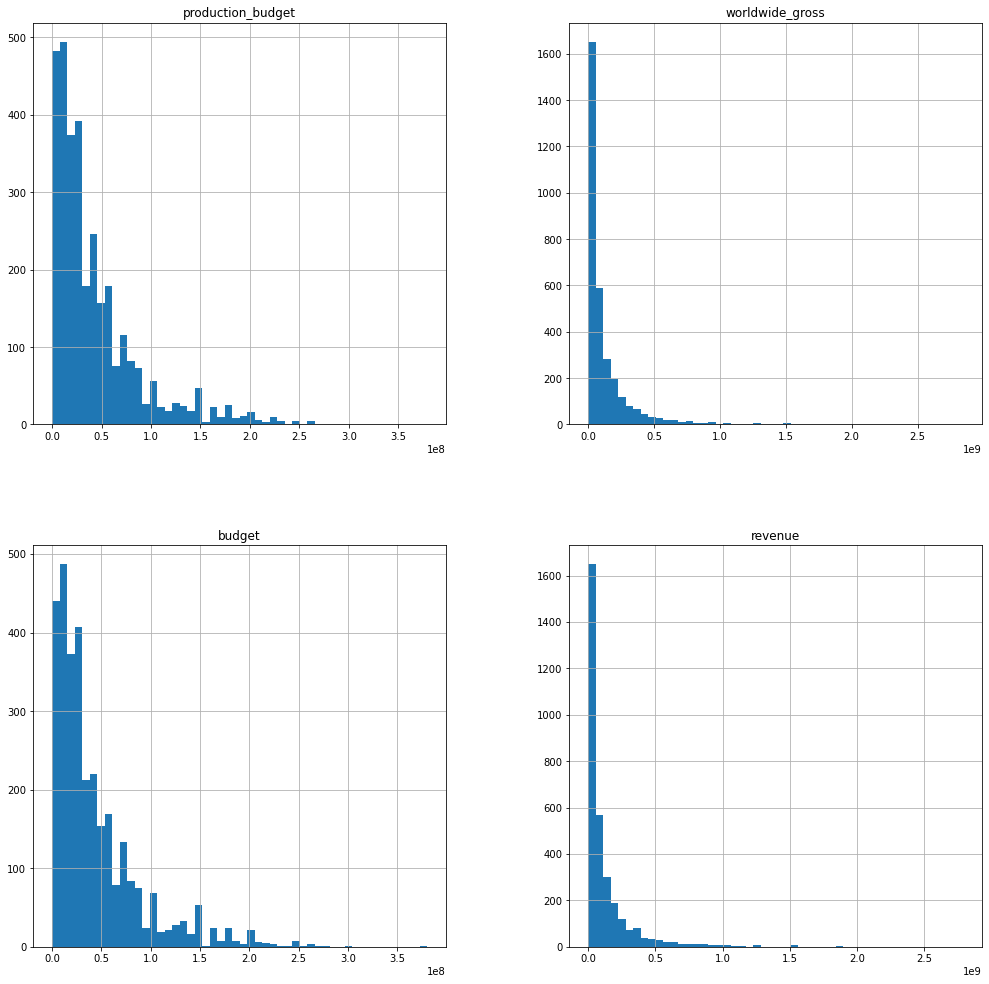

In [50]:
# Distribution Histogram
movies_df.hist(bins=50,figsize=(17,17))
plt.show()

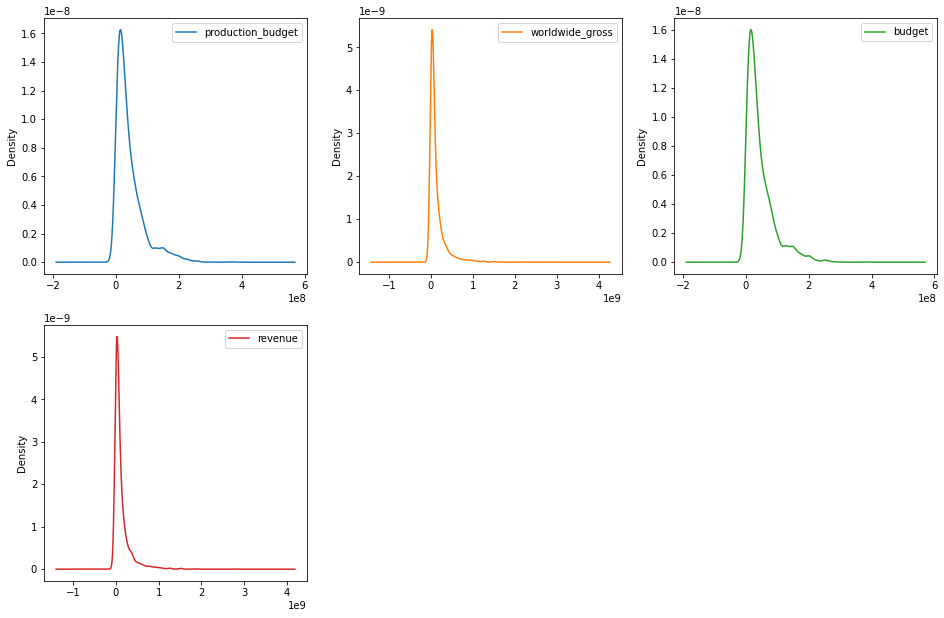

In [51]:
# Distibution - Density
movies_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=10, figsize = (16, 16))
plt.show()


Most Variables seem to be right skewed or positive in relation to our target variable of Gross Revenue
Score seems to be normally distributed


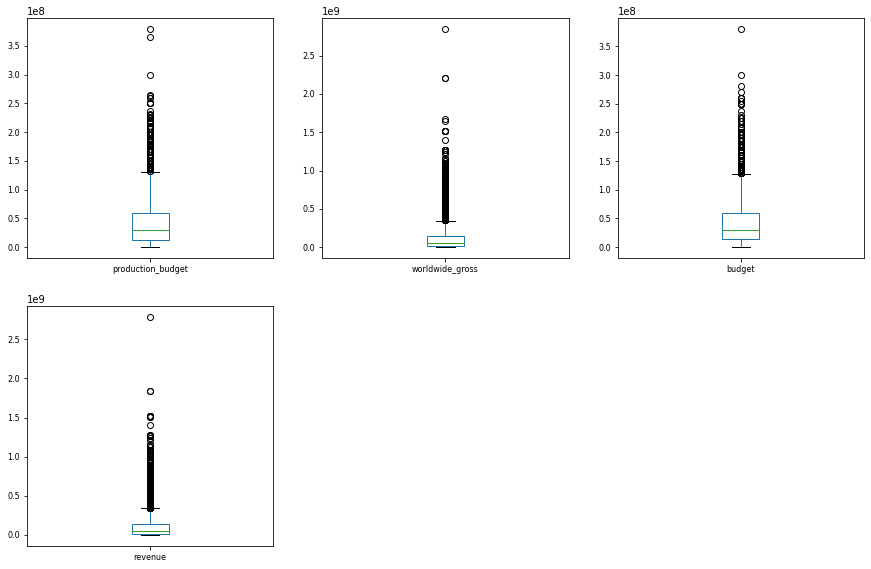

In [52]:
# Box Plot
movies_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

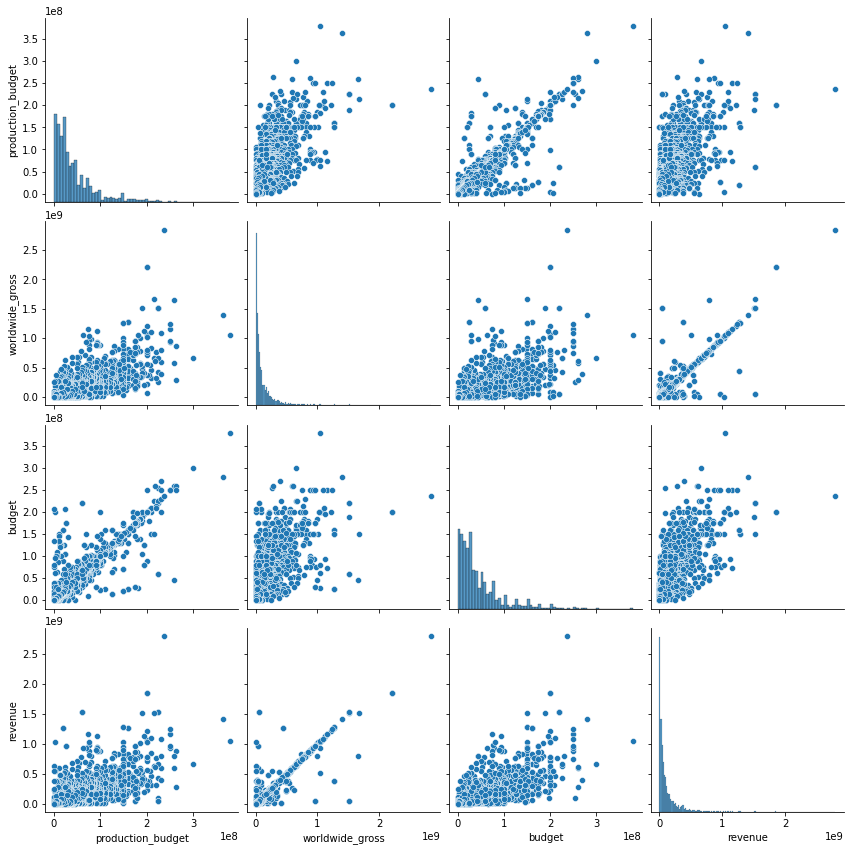

In [53]:
# Scatter Matrix
sn.pairplot(movies_df,height=3) # scatter matrix
plt.show()

Looks to be outliers in all features. 

Text(0, 0.5, 'Budget')

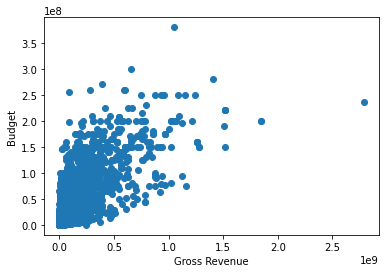

In [54]:
# SCatter of just Gross vs Budget
plt.scatter(movies_df["revenue"],movies_df["budget"])
plt.xlabel("Gross Revenue")
plt.ylabel("Budget")